In [1]:
#!kaggle competitions download -c titanic

In [2]:
#from zipfile import ZipFile

In [3]:
# with ZipFile('titanic.zip', 'r') as zipObj:
#    zipObj.extractall()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_theme()

In [6]:
train_df = pd.read_csv('./train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
null_age = train_df['Age'].isna()
null_embarked = train_df['Embarked'].isna()

train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Age'].fillna(train_df['Embarked'].mode()[0], inplace=True)

Text(0.5, 1.0, 'Distribution plot of ages')

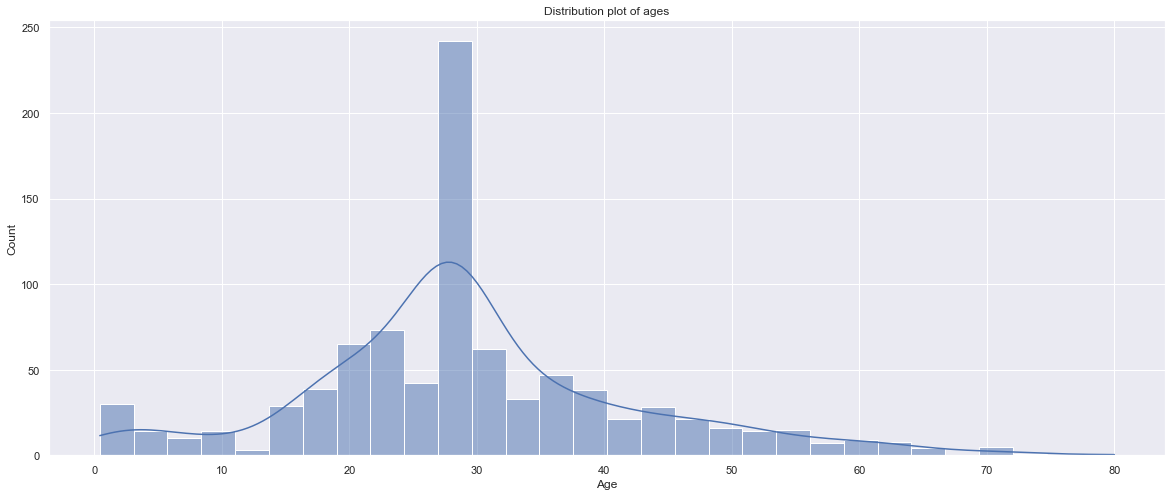

In [12]:
plt.figure(figsize=(20, 8))

sns.histplot(data=train_df, x="Age", kde=True)
plt.title("Distribution plot of ages")

Text(0.5, 1.0, 'Distribution plot of fare')

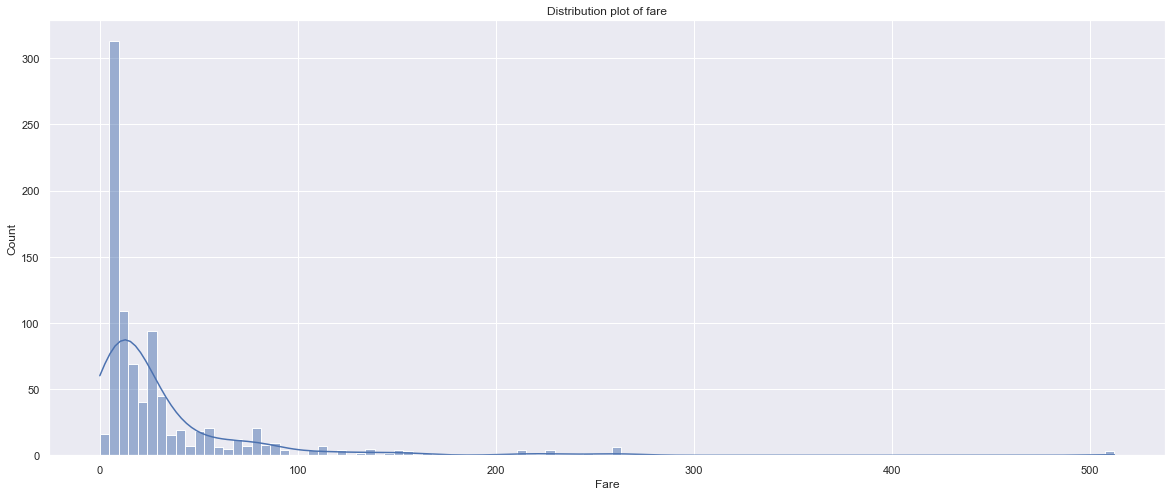

In [13]:
plt.figure(figsize=(20, 8))

sns.histplot(data=train_df, x="Fare", kde=True)
plt.title("Distribution plot of fare")

Text(0.5, 1.0, 'Survived or not based on Sex')

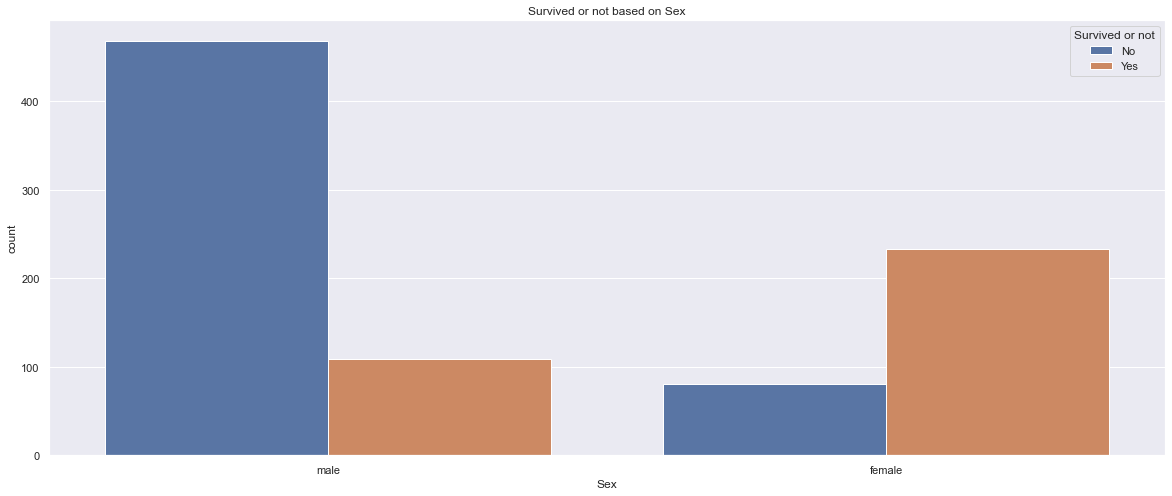

In [14]:
plt.figure(figsize=(20, 8))

sns.countplot(data=train_df, x="Sex", hue="Survived")
plt.legend(title="Survived or not", labels=['No', 'Yes'])
plt.title("Survived or not based on Sex")

Text(0.5, 1.0, 'Survived or not based on Pclass')

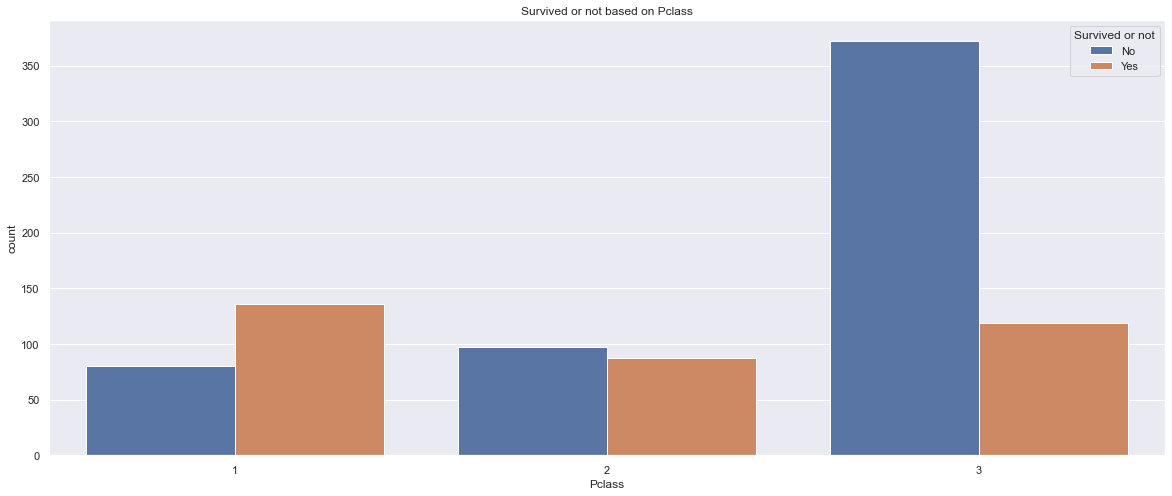

In [15]:
plt.figure(figsize=(20, 8))

sns.countplot(data=train_df, x="Pclass", hue="Survived")
plt.legend(title="Survived or not", labels=['No', 'Yes'])
plt.title("Survived or not based on Pclass")

Text(0.5, 1.0, 'Survived or not based on fare')

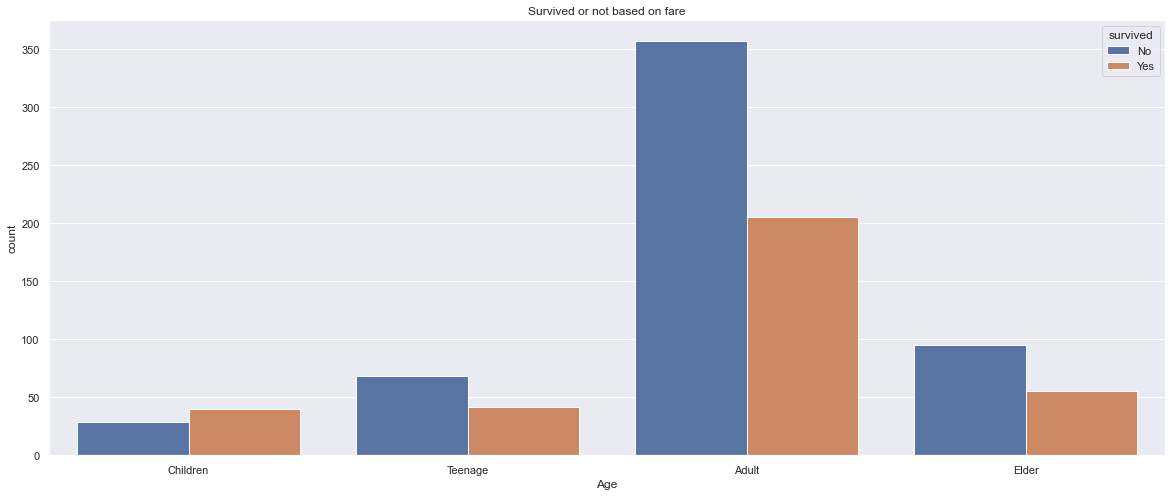

In [16]:
plt.figure(figsize=(20, 8))

temp = train_df.copy()
temp['Age'] = pd.cut(temp['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
sns.countplot(data=temp, x="Age", hue="Survived")
plt.legend(title="survived", labels=['No', 'Yes'])
plt.title("Survived or not based on fare")

Text(0.5, 1.0, 'Survived or not based on fare')

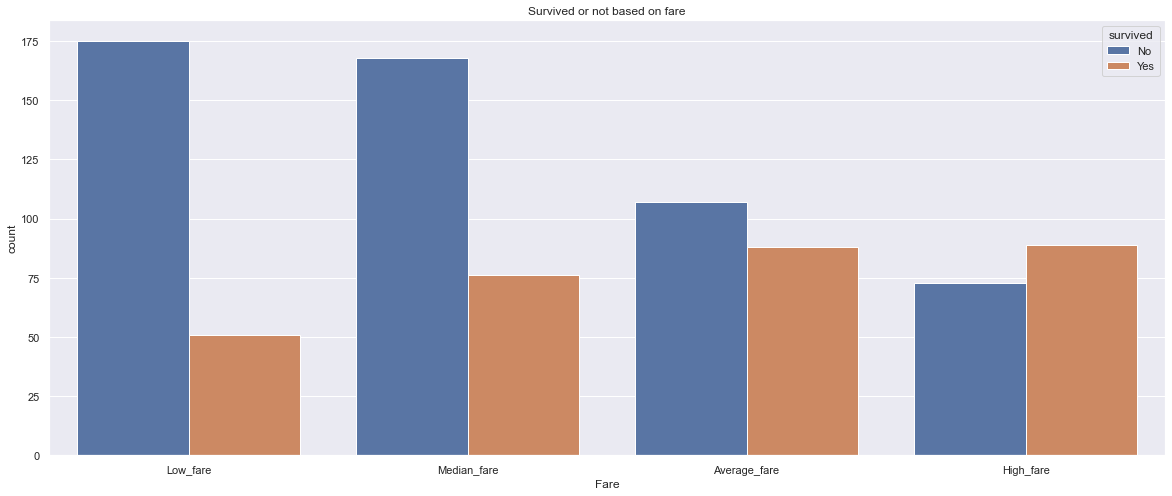

In [17]:
plt.figure(figsize=(20, 8))

temp['Fare'] = pd.cut(temp['Fare'], bins=[0,8,16,32,110], labels=['Low_fare','Median_fare', 'Average_fare', 'High_fare'])
sns.countplot(data=temp, x="Fare", hue="Survived")
plt.legend(title="survived", labels=['No', 'Yes'])
plt.title("Survived or not based on fare")

Text(0.5, 1.0, 'Survived or not based on SibSp')

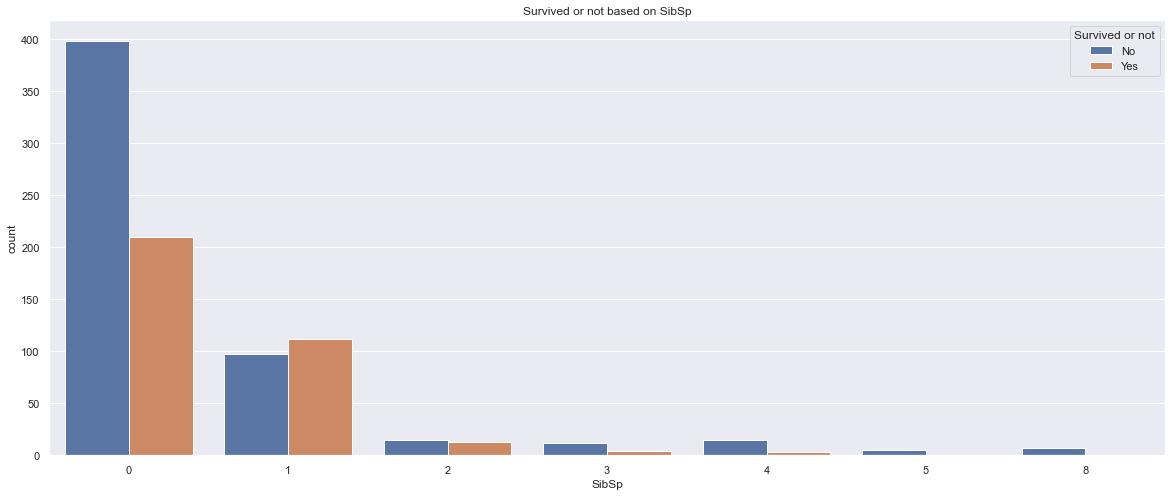

In [18]:
plt.figure(figsize=(20, 8))

sns.countplot(data=train_df, x="SibSp", hue="Survived")
plt.legend(title="Survived or not", labels=['No', 'Yes'], loc="upper right")
plt.title("Survived or not based on SibSp")

Text(0.5, 1.0, 'Survived or not based on Parch')

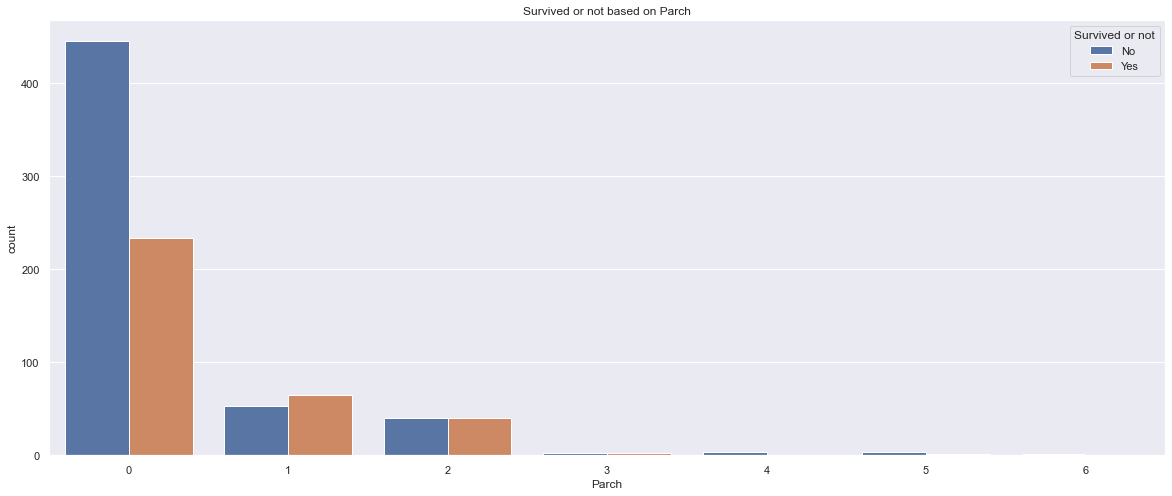

In [19]:
plt.figure(figsize=(20, 8))

sns.countplot(data=train_df, x="Parch", hue="Survived")
plt.legend(title="Survived or not", labels=['No', 'Yes'], loc="upper right")
plt.title("Survived or not based on Parch")

Text(0.5, 1.0, 'Survived or not based on Embarked')

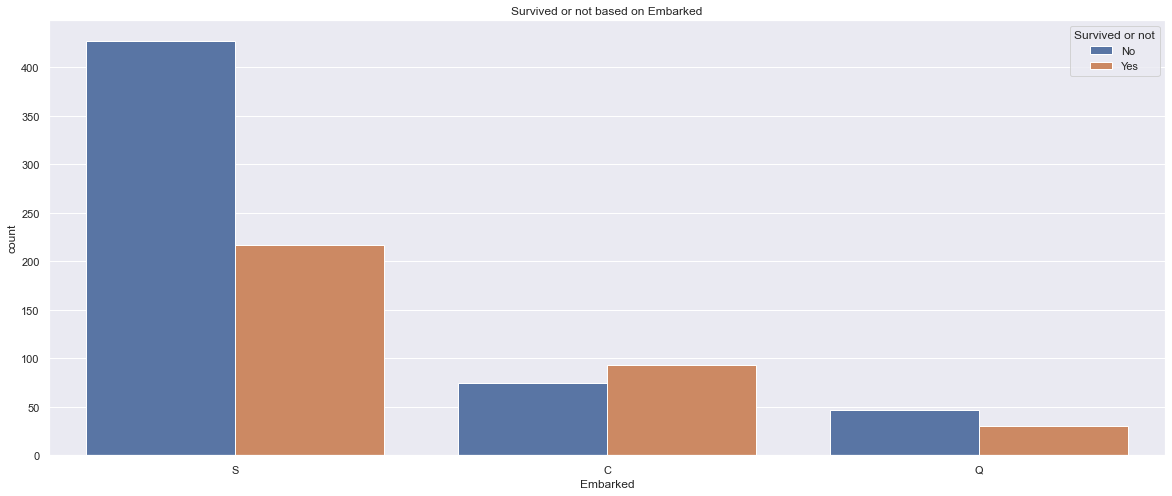

In [20]:
plt.figure(figsize=(20, 8))

sns.countplot(data=train_df, x="Embarked", hue="Survived")
plt.legend(title="Survived or not", labels=['No', 'Yes'], loc="upper right")
plt.title("Survived or not based on Embarked")

EDA results:
- Most female was rescued
- People who paid more for the fare were more likely to be saved
- People who were in a better class had a higher chance of being saved
- People who had 1 sibling had 50% of survival

In [21]:
def clean_data(df):
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, axis=1)
    df['Age'] = pd.cut(df['Age'], bins=[0,12,20,40,120], labels=['Children', 'Teenage', 'Adult', 'Elder'])
    df['Fare'] = pd.cut(df['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare', 'median_fare', 'Average_fare', 'high_fare'])
    df = pd.get_dummies(df, columns = ["Sex", "Age", "Embarked", "Fare", "Pclass"])
    df.drop(['SibSp', 'Parch'], inplace=True, axis=1)
    return df

In [22]:
train_df = clean_data(train_df)
train_df

,Survived,Sex_female,Sex_male,Age_Children,Age_Teenage,Age_Adult,Age_Elder,Embarked_C,Embarked_Q,Embarked_S,Fare_Low_fare,Fare_median_fare,Fare_Average_fare,Fare_high_fare,Pclass_1,Pclass_2,Pclass_3
0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
3,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0
4,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
887,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
888,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
889,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0


In [23]:
Y = train_df['Survived'].to_numpy()
train_df.drop(['Survived'], inplace=True, axis=1)
X = train_df.to_numpy()

In [24]:
print(X.shape)
print(Y.shape)

(891, 16)
(891,)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [26]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)

In [27]:
model = RandomForestClassifier(n_estimators=800,
                             min_samples_split=12,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)
Y_val_pred = model.predict(X_val)
print(f"Train accuracy is {accuracy_score(Y_train, Y_train_pred)}")
print(f"Validation accuracy is {accuracy_score(Y_val, Y_val_pred)}")

Train accuracy is 0.8412921348314607
Validation accuracy is 0.8268156424581006


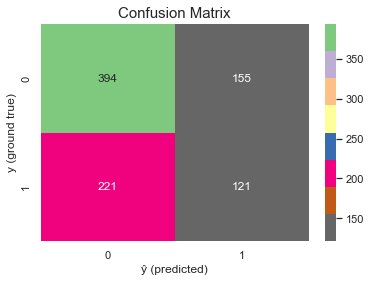

In [30]:
sns.heatmap(confusion_matrix(Y, np.concatenate([Y_train_pred, Y_val_pred], axis=0)),annot=True,fmt='3.0f',cmap="Accent_r")
plt.xlabel("ŷ (predicted)")
plt.ylabel("y (ground true)")
plt.title('Confusion Matrix', y=1, size=15);

In [29]:
test_df = pd.read_csv('./test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
test_df = clean_data(test_df)
X_test = test_df.to_numpy()

In [31]:
Y_test = model.predict(X_test)

In [32]:
Y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [33]:
solution = pd.DataFrame({'PassengerId': range(892, 1310), 'Survived': Y_test})
solution.to_csv('submission.csv', sep=',', index=False)